# 1. Setup 

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier




# 2. Get the data

In [269]:
df = pd.read_csv("datasets/MergeConflictsDataset.csv", sep = ';')
df.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


# 3. Discover and visualize the data to gain insights

In [270]:
df.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [271]:

non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns:")
for col in non_numeric_columns:
    print(f"- {col}")


Non-numeric columns:
- commit
- parent1
- parent2
- ancestor


In [272]:

# numeric_cols = df.select_dtypes(include=['number']).columns
# filtered_df = df[numeric_cols].apply(lambda x: x[(x != 0) & (x != 1)])
# filtered_df = filtered_df.dropna(axis=1, how='all')


# num_plots = len(filtered_df.columns)
# fig, axes = plt.subplots(num_plots, 1, figsize=(15, num_plots * 5))


# for i, col in enumerate(filtered_df.columns):
#     axes[i].hist(filtered_df[col], bins=50, color='skyblue', edgecolor='black')
#     axes[i].set_title(f'{col} Histogram', fontsize=16)
#     axes[i].set_xlabel('Value', fontsize=14)
#     axes[i].set_ylabel('Frequency', fontsize=14)
#     axes[i].tick_params(axis='both', which='major', labelsize=12)

# plt.tight_layout()
# plt.suptitle('Attribute Histogram Plots', fontsize=20, y=1.05)
# plt.show()



Here i created the histograms for every feature

In [273]:
np.random.seed(42)

In [274]:

numeric_df = df.select_dtypes(include='number')


corr_matrix = numeric_df.corr()

conflict_corr = corr_matrix["conflict"].sort_values(ascending=False)

print("Correlation of all features with 'conflict':\n")
print(conflict_corr)



Correlation of all features with 'conflict':

conflict           1.000000
nr commits2        0.303397
devs parent2       0.274583
add                0.235729
density2           0.219509
remove             0.202772
nr files           0.172194
fix                0.164832
update             0.158182
messages_max       0.153547
refactor           0.144355
time               0.136070
change             0.130545
use                0.128977
nr commits1        0.120827
feature            0.118534
bug                0.107971
document           0.097043
modified files     0.090034
devs parent1       0.073838
improve            0.066413
delete             0.060816
added lines        0.040154
deleted lines      0.036818
messages_mean      0.034018
renamed files      0.031805
deleted files      0.023776
density1           0.022992
added files        0.019285
messages_median    0.018941
messages_min      -0.082620
is pr             -0.436992
copied files            NaN
Name: conflict, dtype: float64

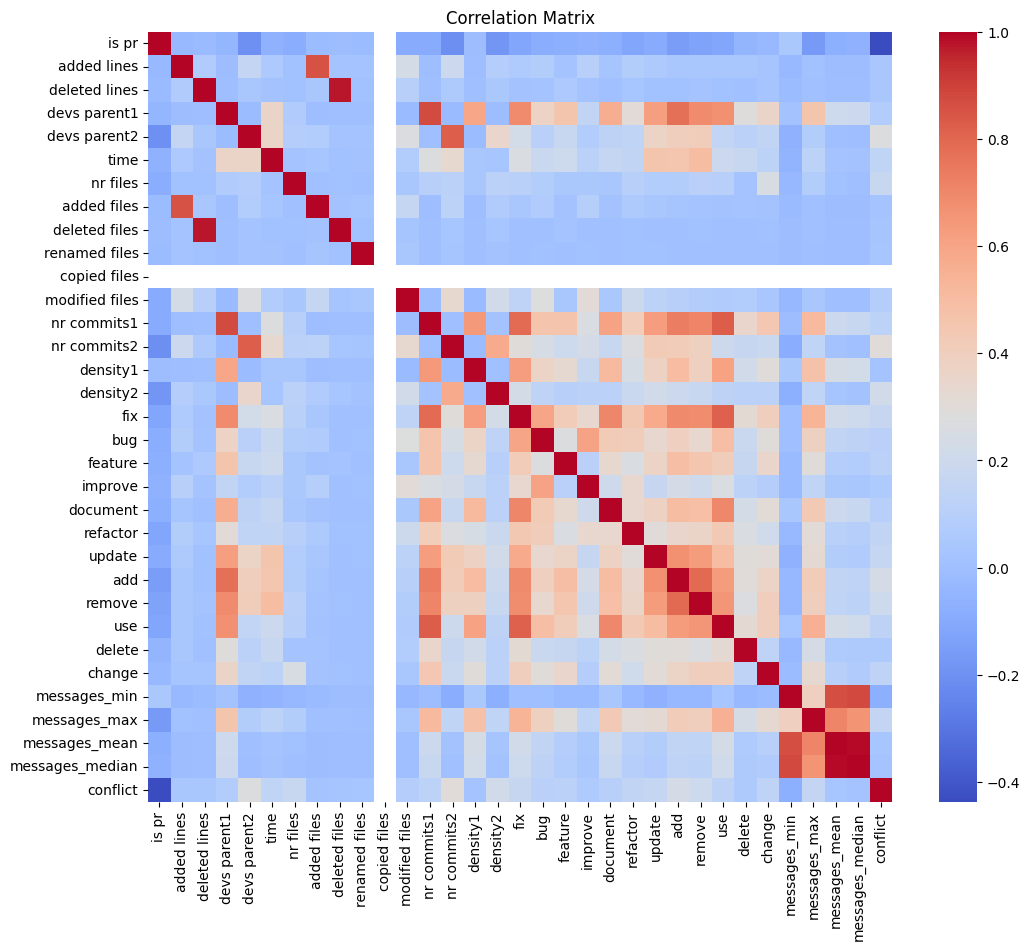

In [275]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

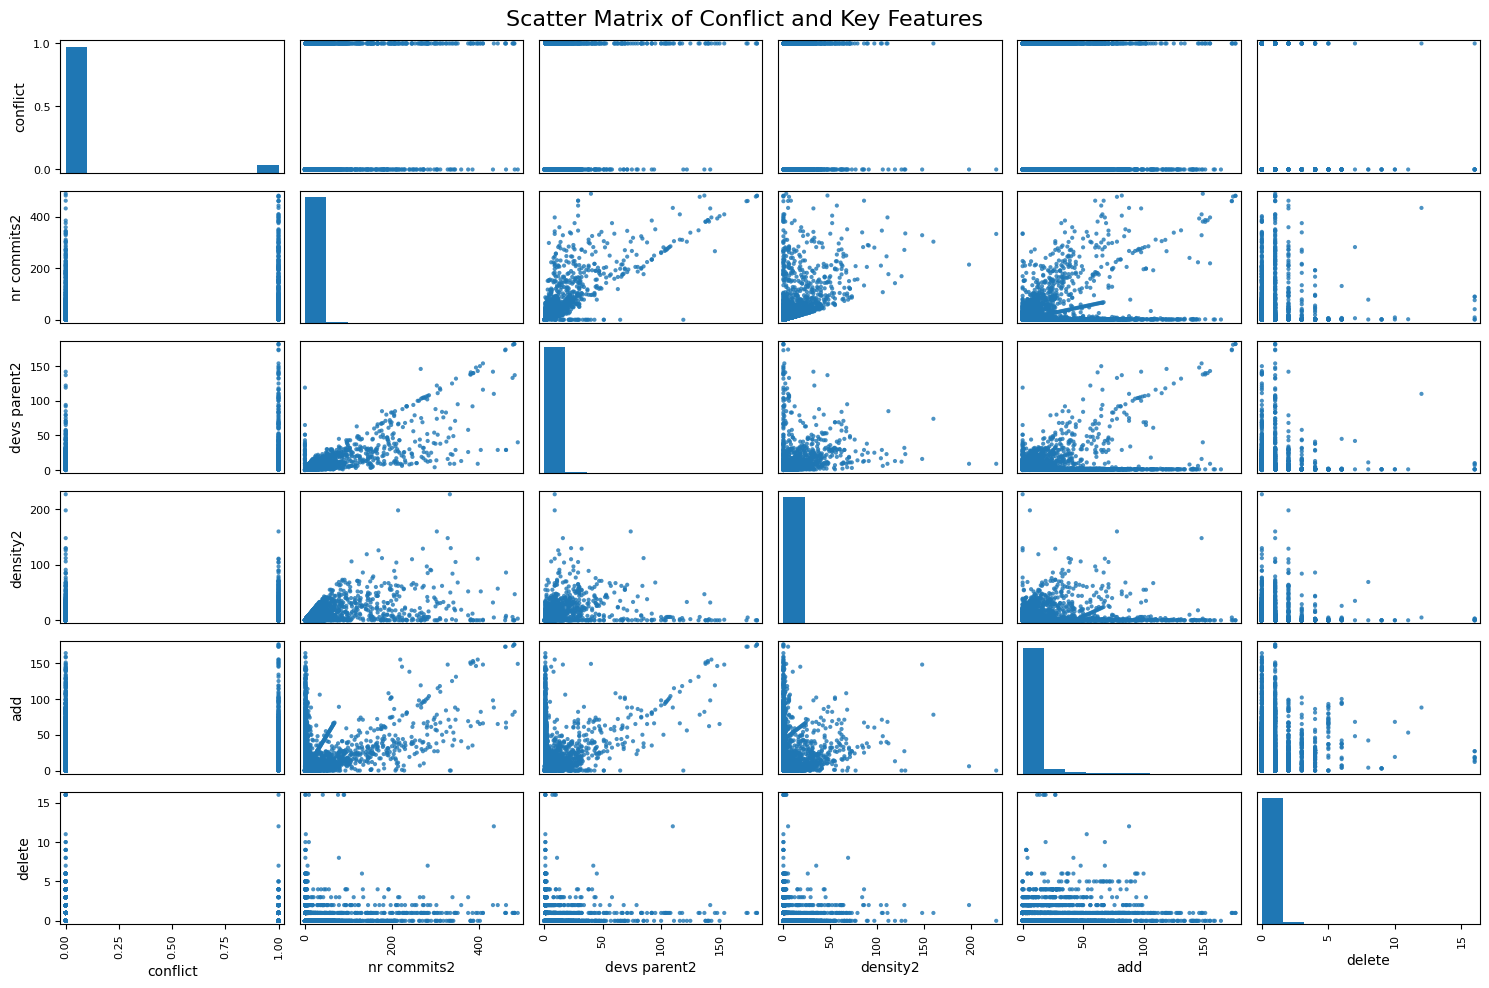

In [276]:

attributes = ["conflict", "nr commits2", "devs parent2", "density2", "add", "delete"]

selected_df = df[attributes]

scatter_matrix(selected_df, figsize=(15, 10), diagonal='hist', alpha=0.8)

plt.suptitle("Scatter Matrix of Conflict and Key Features", fontsize=16)
plt.tight_layout()
plt.show()


In [277]:
df['is pr'].value_counts()

is pr
1    20978
0     5995
Name: count, dtype: int64

In [278]:
print(df[df['is pr'] == 0]['conflict'].value_counts())
print(df[df['is pr'] == 1]['conflict'].value_counts())

conflict
0    4557
1    1438
Name: count, dtype: int64
conflict
0    20948
1       30
Name: count, dtype: int64


In [279]:
avg_conflict = df.groupby('is pr')['conflict'].mean()
print(avg_conflict)

is pr
0    0.239867
1    0.001430
Name: conflict, dtype: float64


(0.0, 1.0)

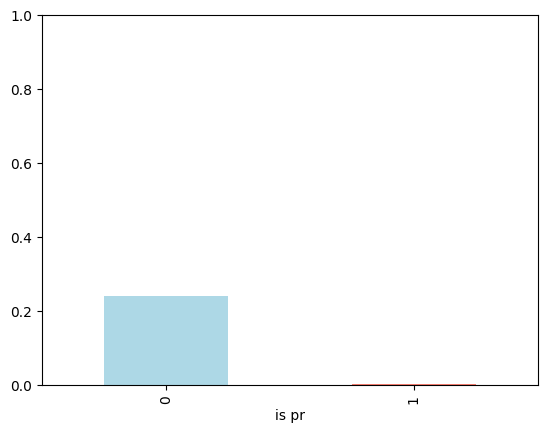

In [280]:
avg_conflict.plot(kind='bar', color=['lightblue', 'salmon'])
plt.ylim(0, 1)  

## Here we can observe that using a Pull Request, DRASTICALLY reduces chances of conflict.
### Probably because code is reviewed before being able to pull request, PR tools detect conflict issues

# 4. Feature Engineering

In [281]:
df_all_features = df.copy()

In [282]:
df['commits_per_dev1'] = df['nr commits1'] / (df['devs parent1'] + 1)
df['commits_per_dev2'] = df['nr commits2'] / (df['devs parent2'] + 1)
# i added this feature it shows how active the devs are 
# i also noticed a high corelation between them in the heat map

In [283]:
df['avg_lines_per_file_added'] = df['added lines'] / (df['added files'] + 1)
df['avg_lines_per_file_deleted'] = df['deleted lines'] / (df['deleted files'] + 1)
# i added these features because the are naturally related, also high corelation in heatmap

In [284]:
#df['use_per_commit_1'] = df['use'] / (df['nr commits1'] + 1)  # +1 

#create a new fetaure (high correaltion) It creates a new column where:
#if use == 0, the value is 0 (meaning "use" was not involved in the commit).
#If use == 1, the value equals the number of commits (because “use” is present)


At this point, I noticed that all keywords(use, add, remove etc) have a high correlation only on branch 1
So, the commits are smaller on branch 1, more focused(detailed), and usually contain small actions
And on branch 2 comitts are broader( Merges, General updates ). commits are ledd detailed


So after i created the use_per_commit, i decided to include all keyowrds as a feature and create 2 separte features for bracnh 1.
keywords/commit 1
keywords/developer



In [285]:
keyword_features = ['fix', 'bug', 'feature', 'improve', 'document', 'refactor', 
                    'update', 'add', 'remove', 'use', 'delete', 'change']

df['total_keyword_mentions'] = df[keyword_features].sum(axis=1) 
#combine all featyres

df['keywords_per_commit_1'] = df['total_keyword_mentions'] / (df['nr commits1'] + 1)
df['keywords_per_dev_1'] = df['total_keyword_mentions'] / (df['devs parent1'] + 1)
#craeet the interaction features


 here craete 2 separate df one with dropped oliumns with no corelation and the redundant columns and one with everything

## Here i do 4) feature (i.e., attribute) selection for slim models from the assignment


In [286]:

id_columns = ["commit", "parent1", "parent2", "ancestor"]


low_corr_columns = [
    'renamed files', 'copied files', 
    'messages_mean', 'messages_median', 'messages_min', 'messages_max', 
    'density1', 'added files',
]

redundant_columns = [
    'nr commits1', 'nr commits2',
    'devs parent1', 'devs parent2',
    'added lines', 'deleted lines',
    'added files', 'deleted files'
]

keyword_features = ['fix', 'bug', 'feature', 'improve', 'document', 'refactor', 
                    'update', 'add', 'remove', 'use', 'delete', 'change']


columns_to_drop = id_columns + low_corr_columns + redundant_columns + keyword_features

columns_to_drop = [col for col in columns_to_drop if col in df.columns and col != 'conflict']

df_selected_features = df.drop(columns=columns_to_drop)
df_all_features =  df_all_features.drop(columns=id_columns)

print("With all features:", df_all_features.shape)
print("With selected features:", df_selected_features.shape)


With all features: (26973, 33)
With selected features: (26973, 13)


# 4. Prepare the data for Machine Learning algorithms (on relevant and new features)

## Here i do the 6 th part of the assignment: propose new features and evaluate them according to the steps above

In [287]:
# Split features and labels
X = df_selected_features.drop("conflict", axis=1)  
y = df_selected_features["conflict"].copy()     


In [288]:
X.isnull().sum()

is pr                         0
time                          0
nr files                      0
modified files                0
density2                      0
commits_per_dev1              0
commits_per_dev2              0
avg_lines_per_file_added      0
avg_lines_per_file_deleted    0
total_keyword_mentions        0
keywords_per_commit_1         0
keywords_per_dev_1            0
dtype: int64

### I have no null values so i do not need to drop/impute any column

### Also, I do no need to encode any column as i i dropped id columns from the df

In [289]:

print(X.dtypes)


is pr                           int64
time                            int64
nr files                        int64
modified files                  int64
density2                        int64
commits_per_dev1              float64
commits_per_dev2              float64
avg_lines_per_file_added      float64
avg_lines_per_file_deleted    float64
total_keyword_mentions          int64
keywords_per_commit_1         float64
keywords_per_dev_1            float64
dtype: object


In [290]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Train/Test split (including data stratification) 

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6.1. Select and train a model (Basic DecisionTreeClassifier)


In [292]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)


# 7.1. Performance Metric Selection

In [293]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.959406858202039


This means that my model correctly predicted if there is a conflict 95.94% of the time out of all predictions made.

In [294]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[5004   97]
 [ 122  172]]


In [295]:
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
print("F1 Score:", f1)

F1 Score: 0.61101243339254


# 6.2. Select and train a model (DecisionTreeClassifier with GridSearchCV)

In [296]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}


dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
)

grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

## Explaining the param_grid for the GridSearchCV
### max_depth : limits maximum depth -> deeper trees more complexity but likely to overfit
### min_samples_split:  controls whether a node is allowed to split or not, based on how many training examples it contains.
### min_samples_leaf:  Minimum number of samples required to be at a leaf node
### criterion: The function used to measure the quality of a split.

### this grid_search uses cross-validation to determine the params (tuning the model), after i retrain the model on the train data and predict on test data (unseen data until now - preventing it from overfitting)

# 7.2. Performance Metric Selection

In [297]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9655236329935125


In [298]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[5019   82]
 [ 104  190]]


In [299]:
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [300]:
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
print("F1 Score:", f1)

F1 Score: 0.6713780918727915


# 6.3. Select and train a model (DecisionTreeClassifier with RandomizedSearchCV)

In [301]:
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}


random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)


search_dt_model = random_search.best_estimator_

y_pred = best_dt_model.predict(X_test)

In [302]:
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
print("F1 Score:", f1)

F1 Score: 0.6713780918727915


# 7.3. Performance Metric Selection

In [303]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9655236329935125


In [304]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[5019   82]
 [ 104  190]]


In [305]:
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
print("F1 Score:", f1)

F1 Score: 0.6713780918727915


# 6.4. Train a SVM

In [306]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [307]:
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy:  0.9573679332715477
Confusion Matrix:
 [[5065   36]
 [ 194  100]]


In [308]:
f1 = f1_score(y_test, y_pred_svm, average='binary', pos_label=1)
print("F1 Score:", f1)

F1 Score: 0.46511627906976744


# 6.5. Train a RandomForrestClassifier

In [309]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [310]:
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy:  0.966079703429101
Confusion Matrix:
 [[5031   70]
 [ 113  181]]


In [311]:
f1 = f1_score(y_test, y_pred_rf, average='binary', pos_label=1)
print("F1 Score:", f1)

F1 Score: 0.6642201834862386


# 6.6 Train a AdaBoost

In [312]:
adaboost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (for conflict):", f1_score(y_test, y_pred))

Accuracy: 0.9618164967562558
F1 Score (for conflict): 0.6385964912280702


# 6.7 Train a XGBoost

In [313]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("Best XGBoost F1 Score:", f1)

Best XGBoost F1 Score: 0.6544117647058824


# 6.8 Train a special GridSearch

In [314]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [8,10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

grid_best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"Best F1 Score: {f1:.4f}")
print("Best Parameters:", grid_search.best_params_)

Best F1 Score: 0.6714
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [315]:
# New feature names
feature_names = [
    'is pr',
    'time',
    'nr files',
    'modified files',
    'density2',
    'commits_per_dev1',
    'commits_per_dev2',
    'avg_lines_per_file_added',
    'avg_lines_per_file_deleted',
    'total_keyword_mentions',
    'keywords_per_commit_1',
    'keywords_per_dev_1'
]

importances = grid_best_dt_model.feature_importances_

# Create the DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                       Feature  Importance
2                     nr files    0.609229
0                        is pr    0.271969
10       keywords_per_commit_1    0.026859
7     avg_lines_per_file_added    0.016299
8   avg_lines_per_file_deleted    0.016140
9       total_keyword_mentions    0.014860
5             commits_per_dev1    0.011588
6             commits_per_dev2    0.011559
3               modified files    0.011285
1                         time    0.005243
11          keywords_per_dev_1    0.004969
4                     density2    0.000000


# 6.7 Train VotingCLassifier

In [316]:

voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('dt', grid_best_dt_model)
], voting='hard')
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("Voting Classifier F1 Score:", f1)


Voting Classifier F1 Score: 0.6833631484794276


In [317]:
# Split features and labels
X = df_all_features.drop("conflict", axis=1)  
y = df_all_features["conflict"].copy()  
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

# Initialize the model (decision tree in this case)
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X, y)

# Get the best model from the grid search
grid_best_dt_model = grid_search.best_estimator_

# Extract feature importances
importances = grid_best_dt_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # This assumes X is a DataFrame with column names
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
            Feature  Importance
6          nr files    0.604583
0             is pr    0.275716
1       added lines    0.019723
28     messages_min    0.017148
13      nr commits2    0.015103
2     deleted lines    0.015076
5              time    0.009763
12      nr commits1    0.004656
18          feature    0.003861
30    messages_mean    0.003672
19          improve    0.003630
7       added files    0.003358
27           change    0.003304
31  messages_median    0.003298
11   modified files    0.003054
23              add    0.002688
29     messages_max    0.002316
9     renamed files    0.001546
16              fix    0.001419
4      devs parent2    0.001351
15         density2    0.001297
14         density1    0.001295
21         refactor    0.001178
17              bug    0.000968
8     deleted files    0.000000
10     copied files    0.000000
3      devs parent1    0.000000
20         document    0.000000
22           update    0.000000
26           delete

In [318]:




low_corr_columns = [
    'renamed files', 'copied files', 
    'messages_mean', 'messages_median', 'messages_max', 
    'density1', 'added files',
]

redundant_columns = [
    'nr commits1', 
    'devs parent1', 'devs parent2',
    'added lines', 'deleted lines',
    'added files', 'deleted files'
]

keyword_features = ['fix', 'bug', 'feature', 'improve', 'document', 'refactor', 
                    'update', 'add', 'remove', 'use', 'delete', 'change']


columns_to_drop = id_columns + low_corr_columns + redundant_columns + keyword_features

columns_to_drop = [col for col in columns_to_drop if col in df.columns and col != 'conflict']

df_2_selected_features = df.drop(columns=columns_to_drop)


print("With selected features:", df_2_selected_features.shape)


With selected features: (26973, 15)


In [319]:

# Split features and labels
X = df_2_selected_features.drop("conflict", axis=1)  
y = df_2_selected_features["conflict"].copy()  

# Define parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

# Initialize the model (decision tree in this case)
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the model to the data
grid_search.fit(X, y)

# Get the best model from the grid search
grid_best_dt_model = grid_search.best_estimator_

# Predict using the best model
y_pred = grid_best_dt_model.predict(X)

# Calculate the F1 score
f1 = f1_score(y, y_pred)
print(f"F1 Score: {f1:.4f}")

# Extract feature importances
importances = grid_best_dt_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # This assumes X is a DataFrame with column names
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


F1 Score: 0.7109
Feature Importances:
                       Feature  Importance
0                        is pr    0.542439
2                     nr files    0.282876
3               modified files    0.029956
11      total_keyword_mentions    0.029875
6                 messages_min    0.019111
4                  nr commits2    0.018993
1                         time    0.018354
9     avg_lines_per_file_added    0.017863
12       keywords_per_commit_1    0.009766
10  avg_lines_per_file_deleted    0.007377
5                     density2    0.006366
7             commits_per_dev1    0.006188
8             commits_per_dev2    0.005566
13          keywords_per_dev_1    0.005269


# 8. My Conclusions 